# Project: Investigate Imdb Movie Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
IMDB Movie Data:
This dataset contains information about 10,000 movies collected from The Movie
Database (TMDb),including user ratings and revenue.
Data provided by [Udacity](https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv)<br>
Original data provided by [Kaggle](https://www.kaggle.com/tmdb/tmdb-movie-metadata)<br>

**Dataset features:**<br>
- id,
- imdb_id,
- popularity,
- budget,
- revenue,
- original_title,
- cast,
- homepage,
- director,
- tagline,
- keywords,
- overview,
- runtime,
- genres,
- production_companies,
- release_date,
- vote_count,
- vote_average,
- release_year,
- budget_adj*,
- revenue_adj*<br><br>
**The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.*

Not all features are relevant to the questions this analysis is to answer. Therefore, a few will be taken out.

### Questions:
Question 1: Assuming that one has no prior knowledge about movies, what are the odds of ending up watching a good movie? and how can you best strategise to increase the odds?


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
In this section data is <a href = '#load'>loaded</a>, <a href = #check>checked for cleanliness</a>, and then <a href =#trim>trimed and cleaned</a> for analysis. 

<a id = 'load'></a>

<a id = 'load'></a>

In [2]:
df_raw_data = pd.read_csv('../../Datasets/movies.csv')
df_raw_data.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
print('Dataset consist of {} rows and {} columns.'.format(df_raw_data.shape[0],df_raw_data.shape[1]))

Dataset consist of 10866 rows and 21 columns.


<a id = 'check'></a>
#### Number of Duplicates

In [4]:
print('Of {} rows, {} are unique and {} is a duplicate.'.format(df_raw_data.shape[0],df_raw_data.id.nunique(),df_raw_data.duplicated().sum()))

Of 10866 rows, 10865 are unique and 1 is a duplicate.


#### Number of Missing Values for Each Column

In [5]:
pd.DataFrame(df_raw_data.isna().sum()).transpose()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,0,10,0,0,0,0,76,7930,44,2824,...,4,0,23,1030,0,0,0,0,0,0


#### Number of Empty Rows

In [6]:
df_raw_data.isna().all(1).sum()

0

#### Number of 0s for Each Column

In [7]:
pd.DataFrame(df_raw_data.eq(0).sum()).transpose()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,0,0,0,5696,6016,0,0,0,0,0,...,0,31,0,0,0,0,0,0,5696,6016


#### Number of Unique Values for Each Column
Although this information is not of importance for every column, it helps us ensure not more than one entry is made fore one movie. 

In [8]:
pd.DataFrame(df_raw_data.nunique()).transpose()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,10865,10855,10814,557,4702,10571,10719,2896,5067,7997,...,10847,247,2039,7445,5909,1289,72,56,2614,4840


In [9]:
df_raw_data[['original_title','director','cast']].duplicated().sum()

2

>At first glance, number of unique value for ```original_title``` suggests that we have duplicate entries. However, running the code above explains that there are different movies with the same name.Moreover, it suggests that we have one more duplicate row that perhaps was not detected by ```duplicated()``` earlier du to a difference in one of the columns' entry.

#### Check Columns' Datatype

In [10]:
df_raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>Datatype for ```release_date``` should change to ```datetime```. 

<a id ='trim'></a>	
### Data Cleaning and Triming

**Drop irrelevent columns**

In [11]:
df_raw_data.drop(['imdb_id','popularity','homepage','tagline','overview','budget','revenue'],axis =1, inplace = True)

**Delete Duplicate Rows**

In [12]:
df_raw_data.drop_duplicates(inplace = True)
print('Number of duplicate rows: {}'.format(df_raw_data.duplicated().sum()))

Number of duplicate rows: 0


In [13]:
#Drop rows with entries on the same film
df_raw_data[df_raw_data[['original_title','director','cast']].duplicated()]

,id,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
6701,16781,Madea's Family Reunion,Tyler Perry|Blair Underwood|Lynn Whitfield|Bor...,Tyler Perry,spanking|based on play,110,Drama|Comedy|Romance,Lions Gate Films,2/24/06,63,6.0,2006,6.490015e+06,6.190557e+07


In [14]:
df_raw_data[df_raw_data['original_title'] == "Madea's Family Reunion"]

,id,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
4063,28004,Madea's Family Reunion,Tyler Perry|Blair Underwood|Lynn Whitfield|Bor...,Tyler Perry,NaN,0,Comedy,NaN,1/25/02,49,5.9,2002,7.273568e+06,0.000000e+00
6701,16781,Madea's Family Reunion,Tyler Perry|Blair Underwood|Lynn Whitfield|Bor...,Tyler Perry,spanking|based on play,110,Drama|Comedy|Romance,Lions Gate Films,2/24/06,63,6.0,2006,6.490015e+06,6.190557e+07


In [15]:
df_raw_data.drop([4063],axis = 0, inplace = True)
df_raw_data[df_raw_data['original_title'] == "Madea's Family Reunion"]

,id,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
6701,16781,Madea's Family Reunion,Tyler Perry|Blair Underwood|Lynn Whitfield|Bor...,Tyler Perry,spanking|based on play,110,Drama|Comedy|Romance,Lions Gate Films,2/24/06,63,6.0,2006,6.490015e+06,6.190557e+07


#### Fix Datatypes

**Column ```release_date```**<br>
Datatype for release date is string. It should be converted to datetime.

In [16]:
df_raw_data.release_date = df_raw_data.release_date.apply(lambda d: d.replace(d,d[:-2]))+ df_raw_data.release_year.astype(str)
df_raw_data.release_date = pd.to_datetime(df_raw_data.release_date)
df_raw_data.release_date

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
           ...    
10861   1966-06-15
10862   1966-12-21
10863   1966-01-01
10864   1966-11-02
10865   1966-11-15
Name: release_date, Length: 10864, dtype: datetime64[ns]

> **Explanation**: At first attempt in converting the datatype, the results achieved where not as desired. dates such as d/m/66 were converted to 2066-m-d. So the piece of code below was used to ensure the date in column ```release_date```was more readable:<br>
``` df_raw_data.release_date.apply(lambda d: d.replace(d,d```[ : -2]```))+ df_raw_data.release_year.astype(str)``` 
<br>Conversion took place once this problem was fixed. Consequently, given that column ```release_year```is no longer of use, it is dropped.

**Column ``` id```**<br>
Datatype for id is ```in```. But it has no numerical meaning. It should be converted to string.

### Trim data entries

**Remove white space**

In [17]:
for col in df_raw_data.columns:
    if df_raw_data[col].dtype == str:
        df_raw_data[col] = df_raw_data[col].str.strip().copy()

**Fix columns with multipl-value data entries**

#### Columns ```cast```,  ```keywords```, ```genres```, ```production_companies```
A number of columns have more than one entry for each record. For example column ```cast```contains names of several actors separated by ```'|'```.
This will make it difficult to efficiently analyse the data based on one specific entry. Let's say, we want to have a range of info on movies that have actor 'X' featuring. Current structure of data does not accomodate that easily. Therefore, the entries should be splitted. 

In [18]:
df_raw_data[['cast','keywords','genres','production_companies']].head(3)

,cast,keywords,genres,production_companies
0,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,monster|dna|tyrannosaurus rex|velociraptor|island,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...
1,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,future|chase|post-apocalyptic|dystopia|australia,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...
2,Shailene Woodley|Theo James|Kate Winslet|Ansel...,based on novel|revolution|dystopia|sequel|dyst...,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...


> *Given the size of dataset, to make the process faster the dataset is to be devided into a number of subd-atasets(tables) which later, depending on the requirements of the analysis,will be merged. Consequently, handling null and 0 values will be more pragmatic this way

**Create movie_dataset**

In [19]:
df_movies = df_raw_data[['id', 'original_title','release_date','release_year','runtime','vote_average','budget_adj','revenue_adj']].copy()
print('Number of Nan entries : {}\nNumber of 0 entries: {} to be found in columns: {}'.format(df_movies.isna().sum().sum(),df_movies.eq(0).sum().sum(),list(df_movies.columns[df_movies.eq(0).any() == True])))

Number of Nan entries : 0
Number of 0 entries: 11741 to be found in columns: ['runtime', 'budget_adj', 'revenue_adj']


>In order to fix this, 0 values will be replace by the average value of each feature  for each genre. Therefore, this will be fixed once the data entries for column ```genres``` are fixed.

In [20]:
df_movies.to_csv('../../Datasets/movies_dataset.csv', index = False)

**Create actors_dataset**

In [21]:
df_actors = df_raw_data[['id','cast']].copy()
print('Number of Nan entries : {}\nNumber of 0 entries: {} '.format(df_actors.isna().sum().sum(),df_actors.eq(0).sum().sum()))

Number of Nan entries : 76
Number of 0 entries: 0 


In [22]:
df_actors.dropna(axis = 0, inplace = True)
df_actors.rename(columns = {'cast':'actor'}, inplace = True)
df_actors.to_csv('../../Datasets/df_actors.csv', index = False)

>column's name changed from ```cast ```to ```actor```

In [23]:
df_actors.head(2)

,id,actor
0,135397,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...
1,76341,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...


<a id ='actors_before'></a>
<li><a href = #actors_after>After trimming data entries</a></li>


**Create genres_dataset**

In [24]:
df_genres = df_raw_data[['id','genres']].copy()
df_genres.rename(columns = {'genres':'genre'}, inplace = True)
print('Number of Nan entries : {}\nNumber of 0 entries: {} '.format(df_genres.isna().sum().sum(),df_genres.eq(0).sum().sum()))

Number of Nan entries : 23
Number of 0 entries: 0 


In [25]:
df_genres.dropna(axis = 0, inplace = True)
df_genres.to_csv('../../Datasets/genres_dataset.csv', index = False)

>column's name changed from ```genres ```to ```genre```

<a id ='genres_before'></a>

In [26]:
df_genres.head(2)

,id,genre
0,135397,Action|Adventure|Science Fiction|Thriller
1,76341,Action|Adventure|Science Fiction|Thriller



<li><a href = #genres_after>After trimming data entries</a></li>


**Create keywords_dataset**

In [27]:
df_keywords = df_raw_data[['id','keywords']].copy()
print('Number of Nan entries : {}\nNumber of 0 entries: {} '.format(df_keywords.isna().sum().sum(),df_keywords.eq(0).sum().sum()))

Number of Nan entries : 1492
Number of 0 entries: 0 


In [28]:
df_keywords.dropna(axis = 0, inplace = True)
df_keywords.rename(columns = {'keywords':'keyword'}, inplace = True)
df_keywords.to_csv('../../Datasets/df_keywords.csv', index = False)

>column's name changed from ```keywords ```to ```keyword```

<a id ='keywords_before'></a>

In [29]:
df_keywords.head(2)

,id,keyword
0,135397,monster|dna|tyrannosaurus rex|velociraptor|island
1,76341,future|chase|post-apocalyptic|dystopia|australia


<a id ='keywords_before'></a>
<li><a href = #keywords_after>After trimming data entries</a></li>


**Create production_companies_dataset**

In [30]:
df_production_companies = df_raw_data[['id','production_companies']].copy()
print('Number of Nan entries : {}\nNumber of 0 entries: {} '.format(df_production_companies.isna().sum().sum(),df_production_companies.eq(0).sum().sum()))

Number of Nan entries : 1029
Number of 0 entries: 0 


In [31]:
df_production_companies.dropna(axis = 0, inplace = True)
df_production_companies.rename(columns = {'production_companies':'production_company'}, inplace = True)
df_production_companies.to_csv('../../Datasets/df_production_companies.csv', index = False)

>column's name changed from ```production_companies ```to ```production_company```

<a id ='comp_before'></a>

In [32]:
df_production_companies.head(2)

,id,production_company
0,135397,Universal Studios|Amblin Entertainment|Legenda...
1,76341,Village Roadshow Pictures|Kennedy Miller Produ...


<a id ='comp_before'></a>
<li><a href = #comp_after>After trimming data entries</a></li>


**Function: fix multiple-value data entries**

In [33]:
def split_data (input_dataframe, column_to_trim):
    df_to_trim = input_dataframe[input_dataframe[column_to_trim].str.find('|') != -1].copy()
    df_temp = input_dataframe.copy()
    ind = df_to_trim.index
    for i in ind:
        record_to_fix = df_temp.loc[i].copy()
        df_temp.drop([i], axis = 0, inplace = True)
        temp = record_to_fix.copy()
        for j in range(record_to_fix[column_to_trim].count('|')+1):
            temp[column_to_trim] = record_to_fix[column_to_trim].split('|')[j]
            df_temp = df_temp.append(temp)
    return df_temp

**Trim data**

In [34]:
df_actors_trimmed = split_data(df_actors,'actor')
df_actors_trimmed.to_csv('../../Datasets/actors_dataset_trimmed.csv', index = False)
df_genres_trimmed = split_data(df_genres, 'genre')
df_genres_trimmed.to_csv('../../Datasets/genres_dataset_trimmed.csv', index = False)
df_production_co_trimmed = split_data(df_production_companies, 'production_company')
df_production_co_trimmed.to_csv('../../Datasets/production_companies_dataset_trimmed.csv', index = False)
df_keywords_trimmed = split_data(df_keywords, 'keyword')
df_keywords_trimmed.to_csv('../../Datasets/keywords_dataset_trimmed.csv', index = False)

In [35]:
df_actors = pd.read_csv('../../Datasets/actors_dataset_trimmed.csv')
df_genres = pd.read_csv('../../Datasets/genres_dataset_trimmed.csv')
df_production_companies = pd.read_csv('../../Datasets/production_companies_dataset_trimmed.csv')
df_keywords= pd.read_csv('../../Datasets/keywords_dataset_trimmed.csv')

<a id = 'actors_after'></a>

In [36]:
df_actors[(df_actors.id==135397) | (df_actors.id==76341)]

,id,actor
144,135397,Chris Pratt
145,135397,Bryce Dallas Howard
146,135397,Irrfan Khan
147,135397,Vincent D'Onofrio
148,135397,Nick Robinson
149,76341,Tom Hardy
150,76341,Charlize Theron
151,76341,Hugh Keays-Byrne
152,76341,Nicholas Hoult
153,76341,Josh Helman



<li><a href = #actors_before>Before trimming data entries</li>

<a id = 'genres_after'></a>

In [37]:
df_genres[(df_genres.id==135397) | (df_genres.id==76341)]

,id,genre
2327,135397,Action
2328,135397,Adventure
2329,135397,Science Fiction
2330,135397,Thriller
2331,76341,Action
2332,76341,Adventure
2333,76341,Science Fiction
2334,76341,Thriller


<li><a href = #genres_before>Before trimming data entries</li>

<a id = 'comp_after'></a>

In [38]:
df_production_companies[(df_production_companies.id==135397) | (df_production_companies.id==76341)]

,id,production_company
3440,135397,Universal Studios
3441,135397,Amblin Entertainment
3442,135397,Legendary Pictures
3443,135397,Fuji Television Network
3444,135397,Dentsu
3445,76341,Village Roadshow Pictures
3446,76341,Kennedy Miller Productions


<li><a href = #comp_before>Before trimming data entries</li>

<a id = 'keywords_after'></a>

In [39]:
df_keywords[(df_keywords.id==135397) | (df_keywords.id==76341)]

,id,keyword
931,135397,monster
932,135397,dna
933,135397,tyrannosaurus rex
934,135397,velociraptor
935,135397,island
936,76341,future
937,76341,chase
938,76341,post-apocalyptic
939,76341,dystopia
940,76341,australia


<li><a href = #keywords_before>Before trimming data entries</li>

**Fix 0 values**<br>
Columns ```runtime```, ```budget_adj```and ```revenue_adj```have considerable number of 0 values that will impact the analysis. 0s will be replace by the average value of each column for each genre.

**Fix 0 values for ```runtime```**

In [40]:
def fix_zero_values(column_name):
    df_movies_temp = df_movies[['id',column_name]].copy()
    #genre is saved in a different dataset. merge datasets first
    df_to_fix = pd.merge(df_genres, df_movies_temp,how = 'inner',left_on = 'id', right_on = 'id')
    #take out zeros so the average will not be affected
    df_to_fix_Nonzero = df_to_fix[df_to_fix[column_name] != 0].copy()
    df_to_fix_zero = df_to_fix[df_to_fix[column_name] == 0].copy()
    #calculate average value of the column for each genre
    average_column_value = (df_to_fix_Nonzero.groupby('genre').mean()[column_name])

    #replace zero values
    for i in df_to_fix_zero.index:
        genre = df_to_fix_zero.loc[i,'genre']
        average_value = average_column_value[genre]
        df_to_fix_zero.loc[i,column_name] = average_value
   
    df_zero_value_fixed = df_to_fix_zero.copy()

    #update values of column_name in movies dataset
    df_movies_index = df_movies[df_movies[column_name] == 0].index
    for i in df_movies_index:
        movie_id = df_movies.loc[i,'id']
        if movie_id in df_zero_value_fixed.id.unique():
            column_value = df_zero_value_fixed[df_zero_value_fixed.id == movie_id][column_name].mean()
            df_movies.loc[i,column_name] = column_value

In [41]:
fix_zero_values('runtime')
fix_zero_values('revenue_adj')
fix_zero_values('budget_adj')
print('Number of zero values in runtime columns:',df_movies.runtime.eq(0).sum())
print('Number of zero values in revenue_adj columns:',df_movies.revenue_adj.eq(0).sum())
print('Number of zero values in budget_adj columns:',df_movies.budget_adj.eq(0).sum())

Number of zero values in runtime columns: 1
Number of zero values in revenue_adj columns: 23
Number of zero values in budget_adj columns: 22


> The rows left are the ones for which value of genre column is Nan. calculation of budget/revenue without any clue will not be pragmatic. Therefore, they will be dropped

In [42]:
revenue_adj_id_list = df_movies.query('revenue_adj == "0"').index
df_movies.drop(revenue_adj_id_list, axis = 0, inplace = True)
print('Number of zero values in revenue_adj columns:',df_movies.revenue_adj.eq(0).sum())
print('Number of zero values in budget_adj columns:',df_movies.budget_adj.eq(0).sum())

Number of zero values in revenue_adj columns: 0
Number of zero values in budget_adj columns: 0


In [43]:
df_movies.runtime = df_movies.runtime.astype(int)

In [44]:
df_movies.to_csv('../../Datasets/movies_dataset.csv',index = False)

<a id='eda'></a>
## Exploratory Data Analysis
In this section data is explored to extract insight and answer question. 

#### Question 1: Assuming that one has no prior knowledge about movies, what are the odds of ending up watching a good movie? and how can you best strategise to increase the odds?
To answer this question, data will be explored with vote_average assigned to each movie. first step would be to label movies as good or bad so as to be able to later group them accordingly and perform the analysis.

In [83]:
df_movies.vote_average.describe()

count    10841.000000
mean         5.974071
std          0.934299
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

In [467]:
df_vote_average = df_movies[['id', 'vote_average']].copy()
df_review_temp = df_vote_average.copy()
vote_ranges = [1, 6, 7, 9.2]
review_labels = ['Waste of time', 'Not bad', 'Worth the time']
df_review_temp['review'] = pd.cut(df_review_temp['vote_average'], bins = vote_ranges, labels = review_labels)
df_movie_name = df_movies[['id','original_title']].copy()
df_review = pd.merge(df_movie_name,df_review_temp,how = 'inner', left_on = 'id', right_on = 'id')

#### Q1.A. what are the odds of ending up watching a good movie?

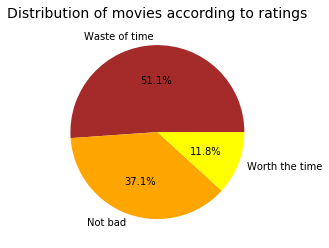

In [468]:
movie_count_per_review_label = df_review.groupby('review').id.count()
plt.pie(movie_count_per_review_label,colors = ['brown','orange','yellow'], labels = ['Waste of time', 'Not bad', 'Worth the time'], autopct='%1.1f%%')
plt.title('Distribution of movies according to ratings',  size = 14);

>Odds are (73% chance) that you'll end up with a movie that won't be too bad. But if the odds are not in your favor, chances are you'll end up wastin your time (15%) since a very small number of movies are actually worth the time(12%).

#### Q1.B. How can you best strategise to increase the odds?
There are two factors to pay attention to. The **release year** and **genre** of a movie.

**Distribution of movies across decades**

In [469]:
#label years according to decates 66-76,76-86,86-96...
df_release_year = df_movies[['id','release_year']].copy()
decade_labels = ['66-75','76-85','86-95','96-05','06-15']
years_bin = [1965,1976,1986,1996,2006,2016]
df_release_year['decade'] = pd.cut(df_release_year['release_year'], bins = years_bin, labels = decade_labels)
df_decades = df_release_year.drop('release_year', axis = 1, inplace = True)
df_review_per_decade = pd.merge(df_review, df_release_year, how = 'inner', left_on = 'id', right_on = 'id')
df_review_per_decade.head(2)

,id,original_title,vote_average,review,decade
0,135397,Jurassic World,6.5,Not bad,06-15
1,76341,Mad Max: Fury Road,7.1,Worth the time,06-15


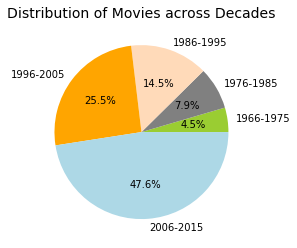

In [470]:
decades_share_in_dataset = df_release_year.groupby('decade').id.count()
label_list = ['1966-1975','1976-1985','1986-1995','1996-2005','2006-2015']
plt.pie(decades_share_in_dataset,colors = ['yellowgreen','gray','peachpuff','orange','lightblue'],labels = label_list, autopct ='%1.1f%%');
plt.title('Distribution of Movies across Decades',size = 14);

>Number of old movies available in dataset is rather small.

#### Chances that a random movie in a specific decade will not be a total waste of time

In [471]:
df_review_per_decade.head(2)

,id,original_title,vote_average,review,decade
0,135397,Jurassic World,6.5,Not bad,06-15
1,76341,Mad Max: Fury Road,7.1,Worth the time,06-15


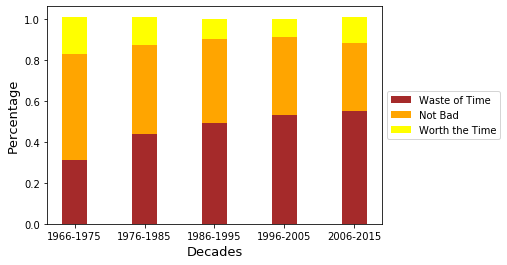

In [472]:
movie_count_per_decade_per_review = df_review_per_decade.groupby(['decade','review']).id.count()
movie_count_per_decade_per_review = movie_count_per_decade_per_review.astype(float)
decade_list = list(movie_count_per_decade_per_review.index.get_level_values('decade').unique().copy())
for decade in decade_list:
    movie_count_per_decade_per_review[decade] = (movie_count_per_decade_per_review[decade]/movie_count_per_decade_per_review[decade].sum()).round(2)
bar_waste_of_time = movie_count_per_decade_per_review[:,'Waste of time']
bar_not_bad = movie_count_per_decade_per_review[:,'Not bad']
bar_worth_the_time = movie_count_per_decade_per_review[:,'Worth the time']
x_locations = np.arange(len(decade_list))
bar_width = 0.35
labels_list = ['1966-1975','1976-1985','1986-1995','1996-2005','2006-2015']
plt.bar(x_locations, bar_waste_of_time, width = bar_width, color = 'brown', label =  'Waste of Time')
plt.bar(x_locations, bar_not_bad, width = bar_width, color = 'orange', label =  'Not Bad', bottom = bar_waste_of_time)
plt.bar(x_locations, bar_worth_the_time, width = bar_width, color = 'yellow', label =  'Worth the Time', bottom = bar_not_bad + bar_waste_of_time)
plt.xticks(x_locations,labels_list)
plt.xlabel('Decades',size = 13)
plt.ylabel('Percentage',size = 13)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));

>Seems like if you choose an old movie (released: 1966-1975) chances of it being a total trash are pretty low. You even have a 20% chance of ending up watching a really good movie. However, this category doesn't offer a big selection. <br>
If you're not up for a disappointment, best to avoid movies released between 2006-2015. But overall, there exists a good portion of movies in each decade that won't waste one's time.

''

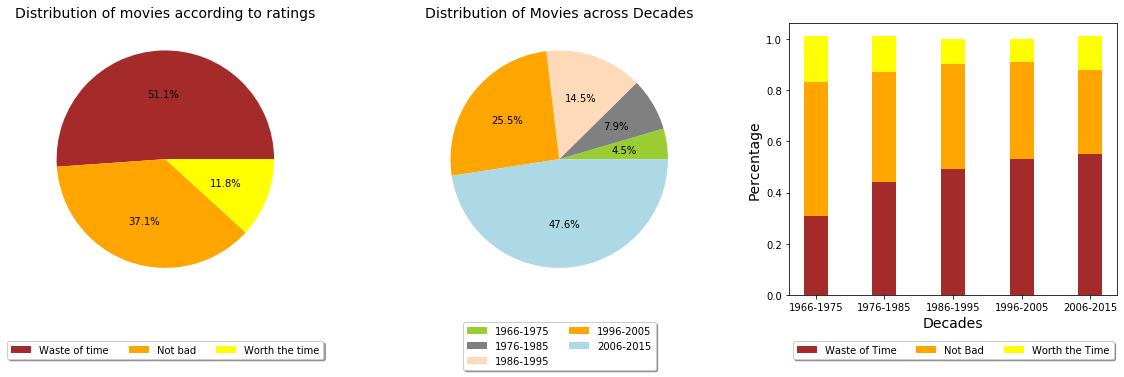

In [473]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize = (20,5))
ax3.bar(x_locations, bar_waste_of_time, width = bar_width, color = 'brown', label =  'Waste of Time')
ax3.bar(x_locations, bar_not_bad, width = bar_width, color = 'orange', label =  'Not Bad', bottom = bar_waste_of_time)
ax3.bar(x_locations, bar_worth_the_time, width = bar_width, color = 'yellow', label =  'Worth the Time', bottom = bar_not_bad + bar_waste_of_time)
ax3.set_xticks(x_locations)
ax3.set_xticklabels(labels_list)
ax3.set_xlabel('Decades',size = 14)
ax3.set_ylabel('Percentage',size = 14)
ax3.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True,ncol=5)
ax2.pie(decades_share_in_dataset,colors = ['yellowgreen','gray','peachpuff','orange','lightblue'],autopct ='%1.1f%%')
ax2.set_title('Distribution of Movies across Decades',size = 14)
ax2.legend(loc='upper center',labels = label_list,  bbox_to_anchor=(0.5, -0.08), fancybox=True, shadow=True,ncol=2)
ax1.pie(movie_count_per_review_label,colors = ['brown','orange','yellow'],autopct='%1.1f%%')
ax1.set_title('Distribution of movies according to ratings',  size = 14)
ax1.legend(labels = ['Waste of time', 'Not bad', 'Worth the time'], loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True,ncol=3)
;

>Overall, it seems like the chances of a movie being a total disappointment is releatively low. If you randomly choose a movie, with 85% chance it will either be ok or good. Chances of the movie being a waste of your time goes up as the realse date gets closer to the present date. However, it is not the final verdict since the number of older movies in this dataset is significantly lower. Also people tend to watch old movies only when it is strongly recommended by others, therefore the ones that got reviewed on Imdb perhaps were anyway on the higher end to begin with. 

**Distribution of movies across genres**

1249

In [263]:
movie_count_per_decade_per_review= df_review_per_decade.groupby(['review','decade',]).id.count()
movie_count_per_decade_per_review['Waste of time']

decade
66-75     19
76-85     89
86-95    187
96-05    397
06-15    926
Name: id, dtype: int64

In [264]:
#calculate the average vote for each decade
df_review_per_decade = pd.merge(df_release_year, df_vote_average, how = 'inner', left_on = 'id', right_on = 'id')
df_review_temp['review'] = pd.cut(df_review_temp['vote_average'], bins = vote_ranges, labels = review_labels)


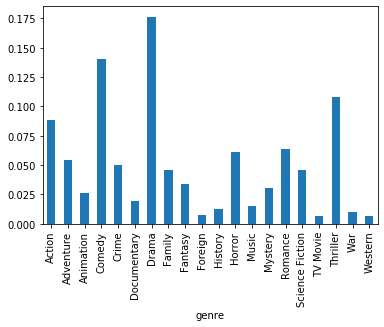

In [218]:
movie_proportion_per_genre.plot(kind = 'bar')

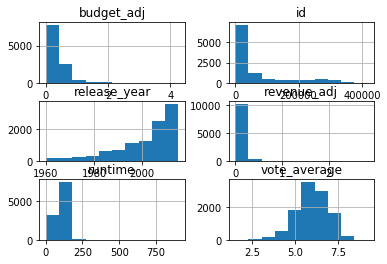

In [219]:
df_movies.hist();

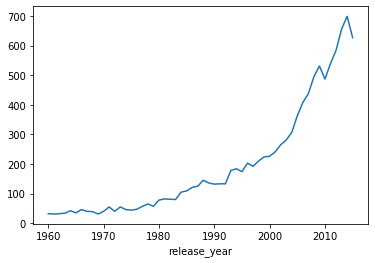

In [220]:
df_movies.groupby('release_year').id.count().plot()

In [221]:
df_movies.groupby('release_year').id.count()

release_year
1960     32
1961     31
1962     32
1963     34
1964     42
1965     35
1966     46
1967     40
1968     39
1969     31
1970     40
1971     55
1972     40
1973     55
1974     46
1975     44
1976     47
1977     57
1978     65
1979     57
1980     78
1981     82
1982     81
1983     80
1984    105
1985    109
1986    121
1987    125
1988    145
1989    136
1990    132
1991    133
1992    133
1993    178
1994    184
1995    174
1996    203
1997    192
1998    210
1999    224
2000    226
2001    241
2002    265
2003    281
2004    307
2005    363
2006    408
2007    438
2008    495
2009    531
2010    487
2011    540
2012    584
2013    656
2014    699
2015    627
Name: id, dtype: int64